In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("../input/titanic/train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
import pandas_profiling as pp
pp.ProfileReport(df)


In [6]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot 
init_notebook_mode(connected=True)

In [7]:
df_sur=df[df['Survived']==0]
df_not=df[df['Survived']==1]

In [8]:
col = "Sex"
v1 = df_sur[col].value_counts().reset_index()
v1 = v1.rename(columns={col:'count',"index":col})
v1["percent"] = v1["count"].apply(lambda x:100*x/sum(v1["count"]))
v1 = v1.sort_values(col)

v2 = df_not[col].value_counts().reset_index()
v2 = v2.rename(columns={col:'count',"index":col})
v2["percent"] = v2["count"].apply(lambda x:100*x/sum(v1["count"]))
v2 = v2.sort_values(col) 

bar1 = go.Bar(x = v1[col], y=v1["count"], name="0")
bar2 = go.Bar(x=v2[col], y=v2["count"], name="1")

data = [bar1, bar2]
layout={'title':"surviving rate male vs female",'xaxis':{'title':"Sex"}}
fig = go.Figure(data=data, layout=layout)
fig.layout.template = "presentation"

iplot(fig)



In [9]:
col = "Pclass"
v1 = df_sur[col].value_counts().reset_index()
v1 = v1.rename(columns={col:'count',"index":col})
v1["percent"] = v1["count"].apply(lambda x:100*x/sum(v1["count"]))
v1 = v1.sort_values(col)

v2 = df_not[col].value_counts().reset_index()
v2 = v2.rename(columns={col:'count',"index":col})
v2["percent"] = v2["count"].apply(lambda x:100*x/sum(v1["count"]))
v2 = v2.sort_values(col) 

bar1 = go.Bar(x = v1[col], y=v1["count"], name="0")
bar2 = go.Bar(x=v2[col], y=v2["count"], name="1")

data = [bar1, bar2]
layout={'title':"surviving rate in Pclass",'xaxis':{'title':"Pclass"},'barmode': 'relative'}
fig = go.Figure(data=data, layout=layout)
fig.layout.template = "presentation"

iplot(fig)

In [10]:
col = "Embarked"
v1 = df_sur[col].value_counts().reset_index()
v1 = v1.rename(columns={col:'count',"index":col})
v1["percent"] = v1["count"].apply(lambda x:100*x/sum(v1["count"]))
v1 = v1.sort_values(col)

v2 = df_not[col].value_counts().reset_index()
v2 = v2.rename(columns={col:'count',"index":col})
v2["percent"] = v2["count"].apply(lambda x:100*x/sum(v1["count"]))
v2 = v2.sort_values(col) 

bar1 = go.Bar(x = v1[col], y=v1["count"], name="0")
bar2 = go.Bar(x=v2[col], y=v2["count"], name="1")

data = [bar1, bar2]
layout={'title':"surviving rate in Embarked",'xaxis':{'title':"Embarked"}}
fig = go.Figure(data=data, layout=layout)
fig.layout.template = "presentation"

iplot(fig)

In [11]:
col = "SibSp"
v1 = df_sur[col].value_counts().reset_index()
v1 = v1.rename(columns={col:'count',"index":col})
v1["percent"] = v1["count"].apply(lambda x:100*x/sum(v1["count"]))
v1 = v1.sort_values(col)

v2 = df_not[col].value_counts().reset_index()
v2 = v2.rename(columns={col:'count',"index":col})
v2["percent"] = v2["count"].apply(lambda x:100*x/sum(v1["count"]))
v2 = v2.sort_values(col) 

bar1 = go.Bar(x = v1[col], y=v1["count"], name="0")
bar2 = go.Bar(x=v2[col], y=v2["count"], name="1")

data = [bar1, bar2]
layout={'title':"surviving rate in SibSp",'xaxis':{'title':"SibSp"}}
fig = go.Figure(data=data, layout=layout)
fig.layout.template = "presentation"

iplot(fig)

In [12]:
col = "Age"
v1 = df_sur[col].value_counts().reset_index()
v1 = v1.rename(columns={col:'count',"index":col})
v1["percent"] = v1["count"].apply(lambda x:100*x/sum(v1["count"]))
v1 = v1.sort_values(col)

v2 = df_not[col].value_counts().reset_index()
v2 = v2.rename(columns={col:'count',"index":col})
v2["percent"] = v2["count"].apply(lambda x:100*x/sum(v1["count"]))
v2 = v2.sort_values(col) 

scat1 = go.Scatter(x = v1[col], y=v1["count"], name="0")
scat2 = go.Scatter(x=v2[col], y=v2["count"], name="1")

data = [scat1, scat2]
layout={'title':"surviving rate on the basic of Age with their names",'xaxis':{'title':"Age"}}
fig = go.Figure(data=data, layout=layout)
fig.layout.template = "presentation"

iplot(fig)

In [13]:
col = "Parch"
v1 = df_sur[col].value_counts().reset_index()
v1 = v1.rename(columns={col:'count',"index":col})
v1["percent"] = v1["count"].apply(lambda x:100*x/sum(v1["count"]))
v1 = v1.sort_values(col)

v2 = df_not[col].value_counts().reset_index()
v2 = v2.rename(columns={col:'count',"index":col})
v2["percent"] = v2["count"].apply(lambda x:100*x/sum(v1["count"]))
v2 = v2.sort_values(col) 

bar1 = go.Bar(x = v1[col], y=v1["count"], name="0")
bar2 = go.Bar(x=v2[col], y=v2["count"], name="1")

data = [bar1, bar2]
layout={'title':"surviving rate on the basic of Parch",'xaxis':{'title':"Parch"},'barmode': 'relative'}
fig = go.Figure(data=data, layout=layout)
fig.layout.template = "presentation"

iplot(fig)

In [14]:
col = "Fare"
v1 = df_sur[col].value_counts().reset_index()
v1 = v1.rename(columns={col:'count',"index":col})
v1["percent"] = v1["count"].apply(lambda x:100*x/sum(v1["count"]))
v1 = v1.sort_values(col)

v2 = df_not[col].value_counts().reset_index()
v2 = v2.rename(columns={col:'count',"index":col})
v2["percent"] = v2["count"].apply(lambda x:100*x/sum(v1["count"]))
v2 = v2.sort_values(col) 

scat1 = go.Scatter(x = v1[col], y=v1["count"], name="0")
scat2 = go.Scatter(x=v2[col], y=v2["count"], name="1")

data = [scat1, scat2]
layout={'title':"surviving rate on the basic of fare with their names",'xaxis':{'title':"Fare"}}
fig = go.Figure(data=data, layout=layout)
fig.layout.template = "presentation"

iplot(fig)

In [15]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


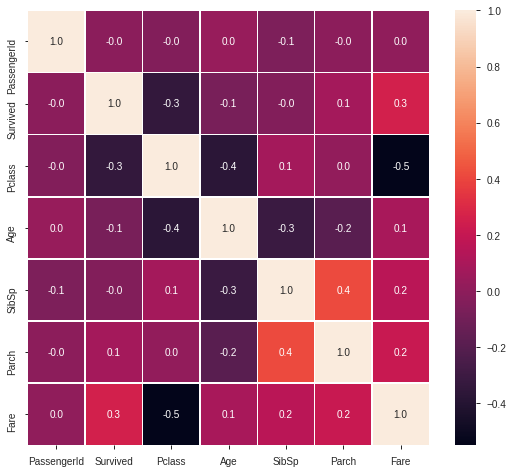

In [16]:
fig,ax = plt.subplots(figsize=(9,8))
ax = sb.heatmap(df.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

In [17]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [18]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [19]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
df['Age'] = df.groupby('Sex')['Age'].apply(lambda x: x.fillna(x.mean()))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df["AgeGrp"] = 1
df.loc[(df.Age.values<12),"AgeGrp"] = 0
df.loc[((df.Age.values>30)*(df.Age.values<50)),"AgeGrp"] = 2
df.loc[(df.Age.values>=50),"AgeGrp"] = 3
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGrp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [22]:
df.drop(['PassengerId','Name','Age','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [23]:
df = pd.get_dummies(df)
df.head()

,Survived,Pclass,SibSp,Fare,AgeGrp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,7.2500,1,0,1,0,0,1
1,1,1,1,71.2833,2,1,0,1,0,0
2,1,3,0,7.9250,1,1,0,0,0,1
3,1,1,1,53.1000,2,1,0,0,0,1
4,0,3,0,8.0500,2,0,1,0,0,1


In [24]:
X = df.drop(['Survived'], axis = 1)
y = df["Survived"].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC


In [27]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)

#SVM classifier
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,y_train)
svc_pred=svc_c.predict(X_test)
sv_cm=confusion_matrix(y_test,svc_pred)
sv_ac=accuracy_score(y_test, svc_pred)

#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)

#GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=30, max_features=4, max_depth=12, random_state=0)
gbc.fit(X_train,y_train)
gbc_pred=gbc.predict(X_test)
gbc_cm=confusion_matrix(y_test,gbc_pred)
gbc_ac=accuracy_score(gbc_pred,y_test)

In [28]:
print("LogisticRegression_accuracy:",lr_ac)
print("SVM_regressor_accuracy:",svr_ac)
print("RandomForest_accuracy:",rdf_ac)
print("DecisionTree_accuracy",dtree_ac)
print("KNN_accuracy:",knn_ac)
print("SVM_classifier_accuracy:",sv_ac)
print("GradientBoostingClassifier_accuracy:",gbc_ac)

LogisticRegression_accuracy: 0.7877094972067039
SVM_regressor_accuracy: 0.7094972067039106
RandomForest_accuracy: 0.8379888268156425
DecisionTree_accuracy 0.8491620111731844
KNN_accuracy: 0.6983240223463687
SVM_classifier_accuracy: 0.7877094972067039
GradientBoostingClassifier_accuracy: 0.8212290502793296


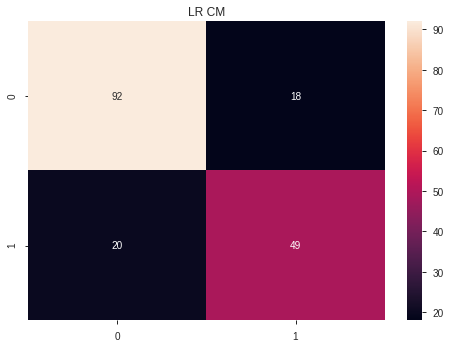

In [29]:
plt.title("LR CM")
sb.heatmap(lr_cm,annot=True)

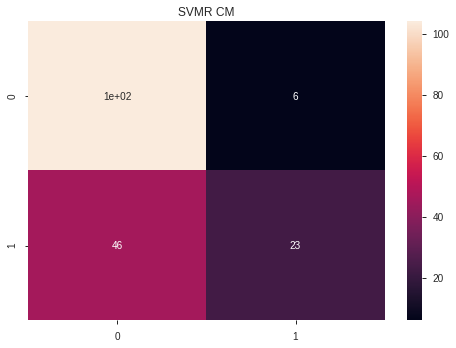

In [30]:
plt.title("SVMR CM")
sb.heatmap(svr_cm,annot=True)

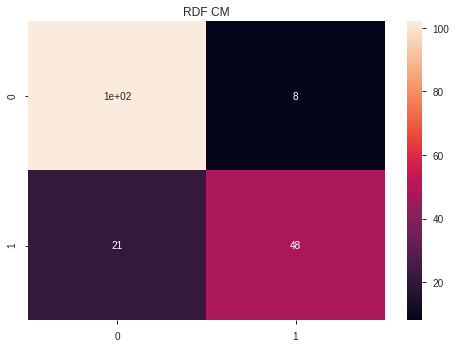

In [31]:
plt.title("RDF CM")
sb.heatmap(rdf_cm,annot=True)

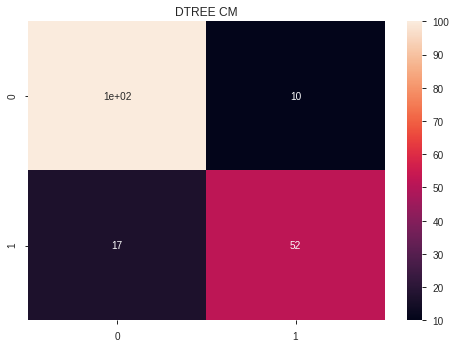

In [32]:
plt.title("DTREE CM")
sb.heatmap(dtree_cm,annot=True)

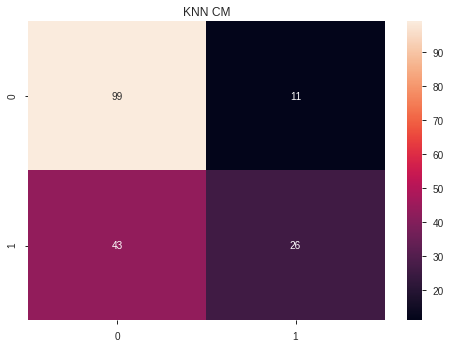

In [33]:
plt.title("KNN CM")
sb.heatmap(knn_cm,annot=True)

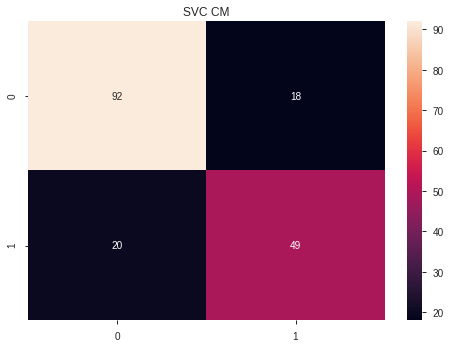

In [34]:
plt.title("SVC CM")
sb.heatmap(sv_cm,annot=True)

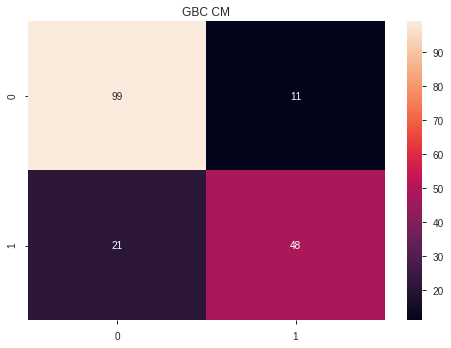

In [35]:
plt.title("GBC CM")
sb.heatmap(gbc_cm,annot=True)

In [36]:
df_test = pd.read_csv("../input/titanic/test.csv")


In [37]:
df_test['Age'] = df_test.groupby('Sex')['Age'].apply(lambda x: x.fillna(x.mean()))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
df_test['Fare'] = df_test.groupby('Sex')['Fare'].apply(lambda x: x.fillna(x.mean()))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
df_test["AgeGrp"] = 1
df_test.loc[(df_test["Age"].values<12),"AgeGrp"] = 0
df_test.loc[((df_test["Age"].values>30)*(df_test.Age.values<50)),"AgeGrp"] = 2
df_test.loc[(df_test["Age"].values>=50),"AgeGrp"] = 3
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGrp
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [40]:
df_test.drop(['Name','Age','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [41]:
df_test = pd.get_dummies(df_test)
df_test.head()

,PassengerId,Pclass,SibSp,Fare,AgeGrp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,7.8292,2,0,1,0,1,0
1,893,3,1,7.0000,2,1,0,0,0,1
2,894,2,0,9.6875,3,0,1,0,1,0
3,895,3,0,8.6625,1,0,1,0,0,1
4,896,3,1,12.2875,1,1,0,0,0,1


In [42]:
survived = dtree_c.predict(df_test.drop(["PassengerId"], axis=1).values)

In [43]:
df_result = pd.DataFrame()
df_result["PassengerId"] = df_test["PassengerId"]
df_result["Survived"] = survived

In [44]:
df_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [45]:
df_result.to_csv("submission.csv",index=False)

In [51]:
df["Fare"] = np.log1p(df["Fare"])

In [52]:
df.head()

,Survived,Pclass,SibSp,Fare,AgeGrp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,2.110213,1,0,1,0,0,1
1,1,1,1,4.280593,2,1,0,1,0,0
2,1,3,0,2.188856,1,1,0,0,0,1
3,1,1,1,3.990834,2,1,0,0,0,1
4,0,3,0,2.202765,2,0,1,0,0,1


In [53]:
X = df.drop(['Survived'], axis = 1)
y = df["Survived"].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [57]:
gbc = GradientBoostingClassifier(n_estimators=50,max_features=9,max_depth=20)

In [58]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=20,
                           max_features=9, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
pred = gbc.predict(X_test)

In [60]:
accuracy_score(pred,y_test)

0.8268156424581006

In [61]:
f1_score(pred,y_test)

0.7669172932330827

In [63]:
rdf_c = RandomForestClassifier()
rdf_c.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
pred = rdf_c.predict(X_test)
accuracy_score(pred,y_test)

0.8379888268156425

In [67]:
f1_score(pred,y_test)

0.7751937984496124

In [68]:
df_test["Fare"] = np.log1p(df_test["Fare"])

In [70]:
survied = rdf_c.predict(df_test.drop(["PassengerId"],axis=1))

In [ ]:
df_result["Survived"] = survived
df_result.to_csv("submission.csv",index=False)